In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
tesla_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\google trends\TESLA Search Trend vs Price.csv")
tesla_df

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [17]:
tesla_df.shape

(124, 3)

In [20]:
tesla_df.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [23]:
tesla_df.TSLA_WEB_SEARCH.max()

31

In [145]:
tesla_df.MONTH.min()

Timestamp('2010-06-01 00:00:00')

In [26]:
# Unemployment Data Frame

unemployment_df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\google trends\UE Benefits Search vs UE Rate 2004-20.csv')
unemployment_df

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [28]:
bitcoin_df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\google trends\Bitcoin Search Trend.csv')
bitcoin_df

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [115]:
bitcoin_price = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\google trends\Daily Bitcoin Price.csv')
bitcoin_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Missing or Junk Values in our Data Frames

In [68]:
tesla_df[tesla_df.isna().any(axis=1)]

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE


In [69]:
unemployment_df[unemployment_df.isna().any(axis=1)]

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE


In [70]:
bitcoin_df[bitcoin_df.isna().any(axis=1)]

,MONTH,BTC_NEWS_SEARCH


In [48]:
bitcoin_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [64]:
bitcoin_price[bitcoin_price.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [79]:
bitcoin_price.dropna(0, inplace=True)

In [99]:
# convert dates into datetime format
tesla_df.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [117]:
tesla_df.MONTH = pd.to_datetime(tesla_df.MONTH)
unemployment_df.MONTH = pd.to_datetime(unemployment_df.MONTH)
bitcoin_df.MONTH = pd.to_datetime(bitcoin_df.MONTH)
bitcoin_price.DATE = pd.to_datetime(bitcoin_price.DATE)

In [118]:
unemployment_df.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

In [119]:
type(tesla_df.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [120]:
# Resampling Time Series Data
bitcoin_price = bitcoin_price.resample('M', on='DATE').last()
bitcoin_price

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


In [121]:
bitcoin_price.resample('M', on='DATE').mean()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [125]:
tesla_df.resample('Y', on='MONTH').last()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
MONTH,,,
2010-12-31,2010-12-01,2,5.326000
2011-12-31,2011-12-01,2,5.712000
2012-12-31,2012-12-01,3,6.774000
2013-12-31,2013-12-01,5,30.086000
2014-12-31,2014-12-01,6,44.481998
2015-12-31,2015-12-01,7,48.001999
2016-12-31,2016-12-01,9,42.737999
2017-12-31,2017-12-01,12,62.270000
2018-12-31,2018-12-01,12,66.559998


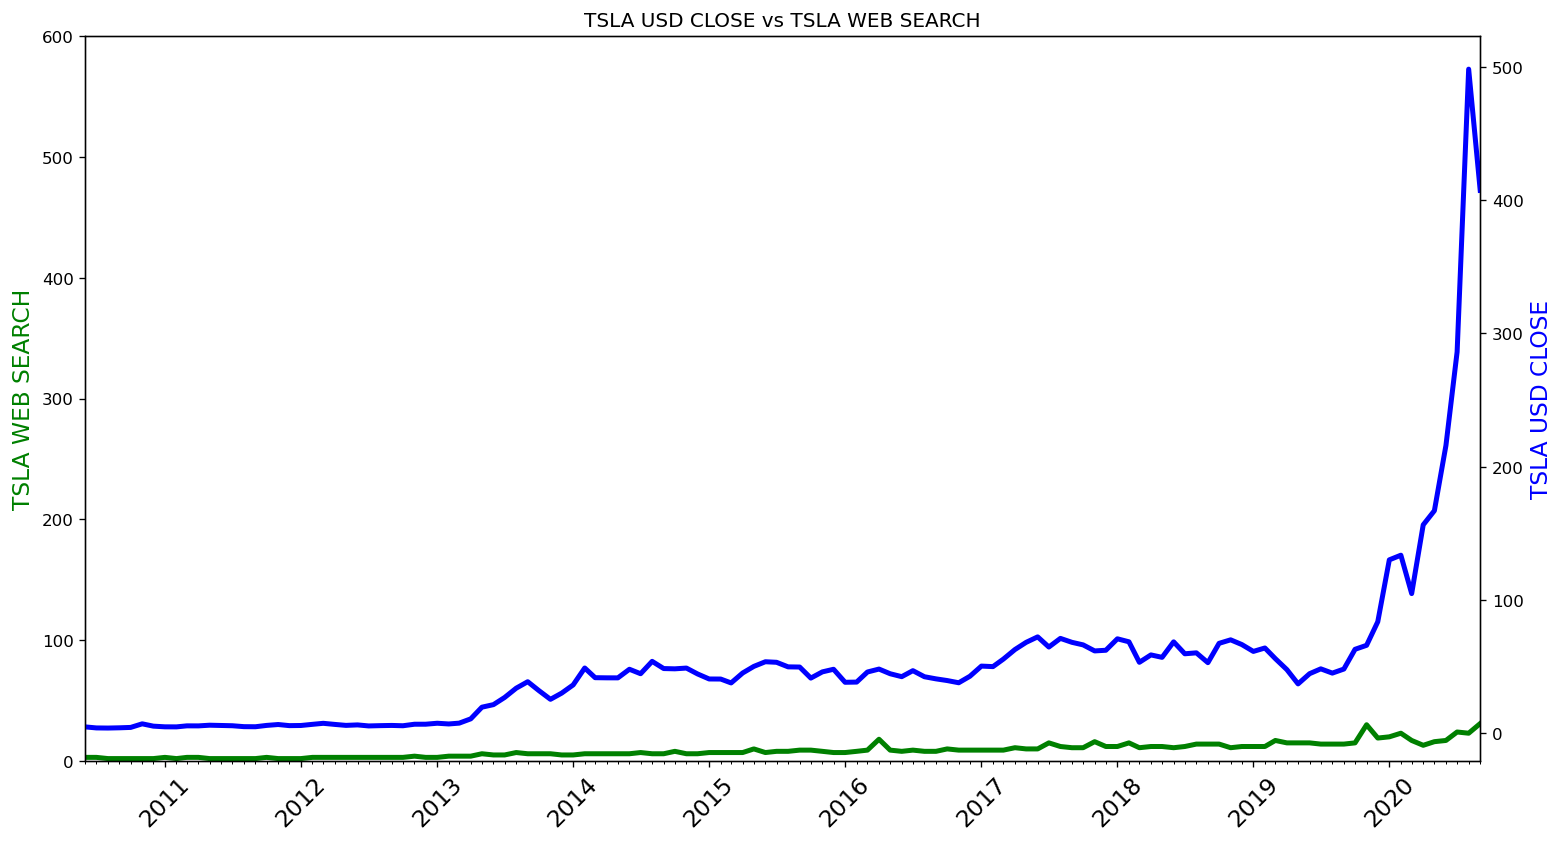

In [158]:
plt.figure(figsize=(15,8), dpi=120)
plt.title('TSLA USD CLOSE vs TSLA WEB SEARCH')

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA WEB SEARCH', color='g', fontsize=14)
ax2.set_ylabel('TSLA USD CLOSE', color='b', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])

ax1.plot(tesla_df.MONTH, tesla_df['TSLA_WEB_SEARCH'], color='g', linewidth=3)
ax2.plot(tesla_df.MONTH, tesla_df['TSLA_USD_CLOSE'], color='b', linewidth=3)

plt.show()

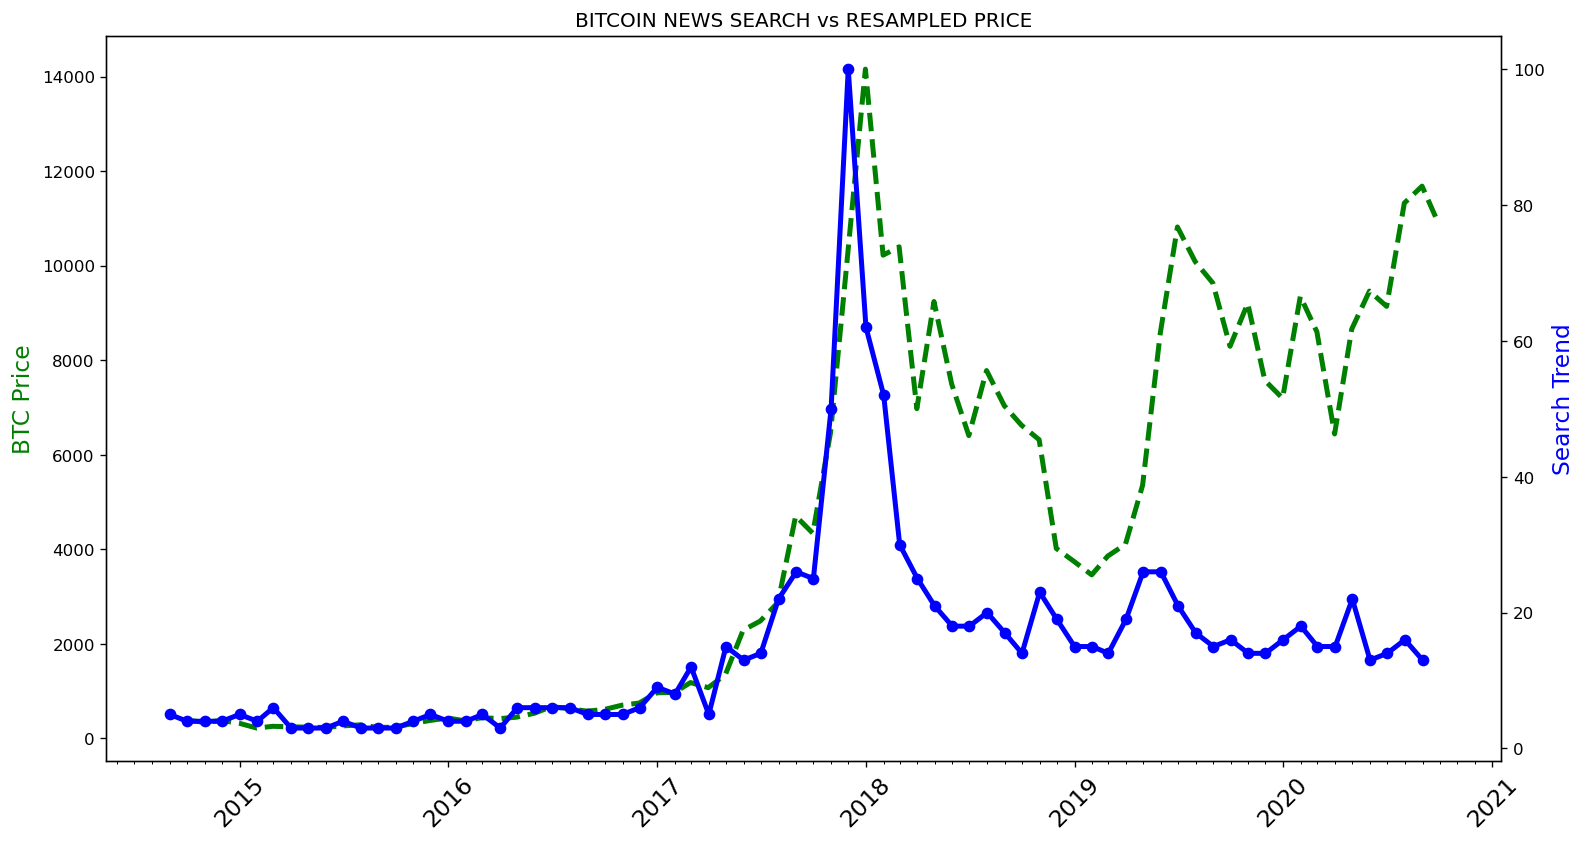

In [171]:
plt.figure(figsize=(15,8), dpi=120)
plt.title('BITCOIN NEWS SEARCH vs RESAMPLED PRICE')

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC Price', color='g', fontsize=14)
ax2.set_ylabel('Search Trend', color='b', fontsize=14)

ax1.plot(bitcoin_price.DATE, bitcoin_price['CLOSE'], color='g', linestyle='--', linewidth=3)
ax2.plot(bitcoin_df.MONTH, bitcoin_df['BTC_NEWS_SEARCH'], color='b', marker='o', linewidth=3)

plt.show()

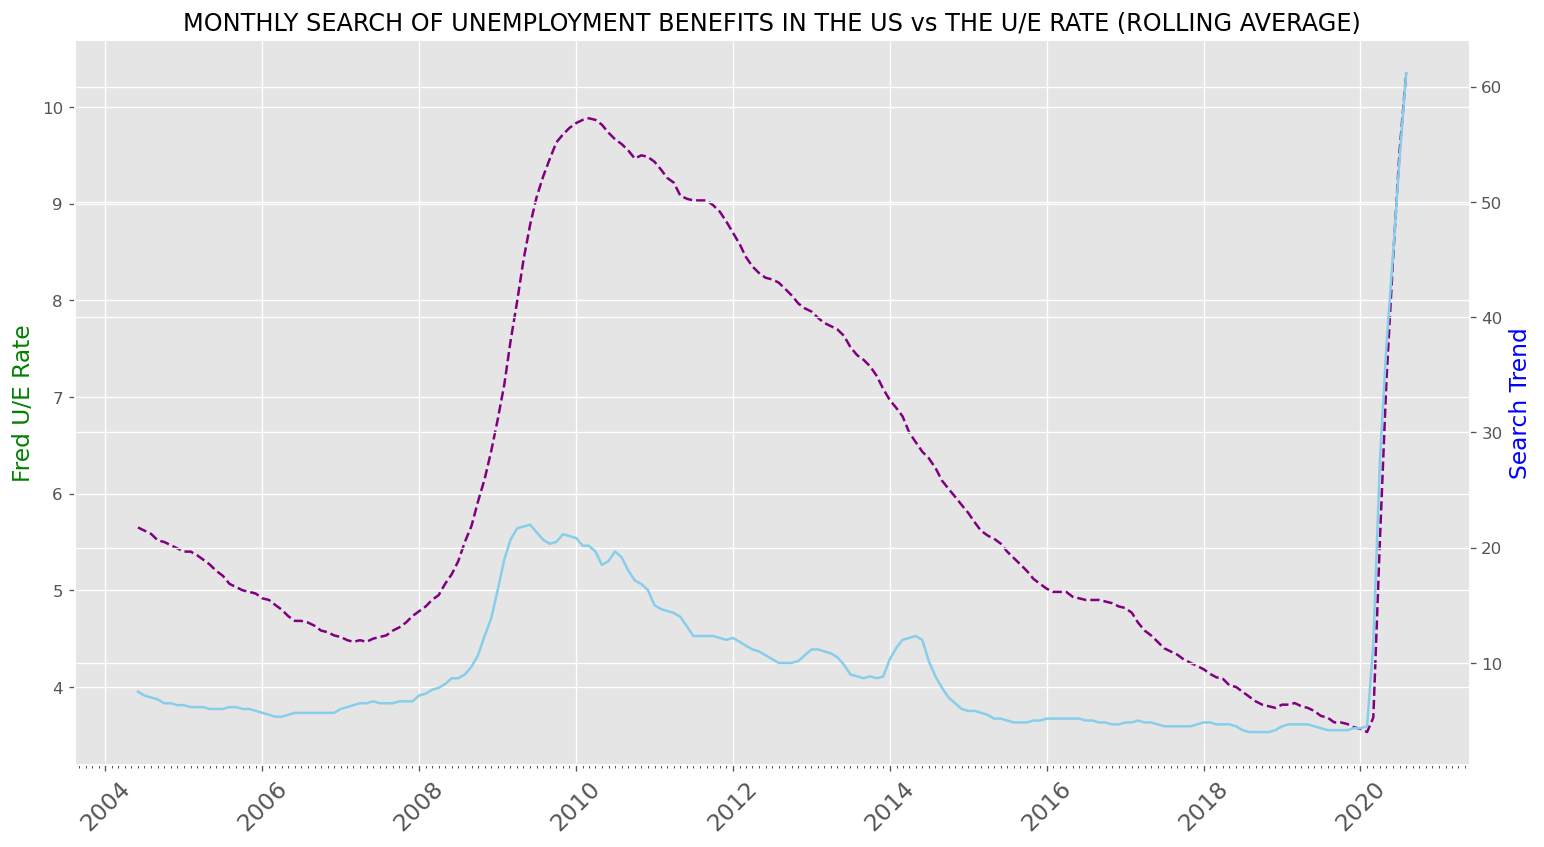

In [185]:
roll_df = unemployment_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

plt.style.use('ggplot')
plt.figure(figsize=(15,8), dpi=120)
plt.title('MONTHLY SEARCH OF UNEMPLOYMENT BENEFITS IN THE US vs THE U/E RATE (ROLLING AVERAGE)')
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Fred U/E Rate', color='g', fontsize=14)
ax2.set_ylabel('Search Trend', color='b', fontsize=14)

ax1.plot(unemployment_df.MONTH, roll_df['UNRATE'], color='purple', linestyle='--')
ax2.plot(unemployment_df.MONTH, roll_df['UE_BENEFITS_WEB_SEARCH'], color='skyblue')

plt.show()

In [172]:
unemployment_df

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2
